In [22]:
!pip install keras

In [23]:
!pip install tensorflow

  Obtaining dependency information for keras<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

## Load Dataset

In [2]:
data = pd.read_csv('samsung.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-14,40450.0,40700.0,39850.0,40050.0,35257.992188,11984996
1,2019-01-15,40050.0,41100.0,39850.0,41100.0,36182.363281,11492756
2,2019-01-16,41150.0,41450.0,40700.0,41450.0,36490.484375,8491595
3,2019-01-17,41700.0,42100.0,41450.0,41950.0,36930.648438,11736903
4,2019-01-18,42000.0,42400.0,41950.0,42300.0,37238.777344,11029256


## Compute Mid Price

In [7]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

## Create Windows

In [8]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

## Normalize Data

In [9]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1063, 50, 1), (118, 50, 1))

## Build a Model

In [10]:
    
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [11]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20

107/107 [==============================] - 9s 46ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 2/20
107/107 [==============================] - 2s 16ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 3/20
107/107 [==============================] - 3s 30ms/step - loss: 9.8703e-04 - val_loss: 4.8227e-04
Epoch 4/20
107/107 [==============================] - 2s 22ms/step - loss: 9.0073e-04 - val_loss: 5.2263e-04
Epoch 5/20
107/107 [==============================] - 2s 18ms/step - loss: 8.0426e-04 - val_loss: 6.2092e-04
Epoch 6/20
107/107 [==============================] - 2s 17ms/step - loss: 7.4684e-04 - val_loss: 3.9459e-04
Epoch 7/20
107/107 [==============================] - 3s 24ms/step - loss: 7.2952e-04 - val_loss: 3.5718e-04
Epoch 8/20
107/107 [==============================] - 4s 36ms/step - loss: 6.9410e-04 - val_loss: 4.5205e-04
Epoch 9/20
107/107 [==============================] - 4s 37ms/step - loss: 6.5668e-04 - val_loss: 3.5478e-04
Epoch 10/20
107/107 [=============

## Prediction

4/4 [==============================] - 0s 13ms/step


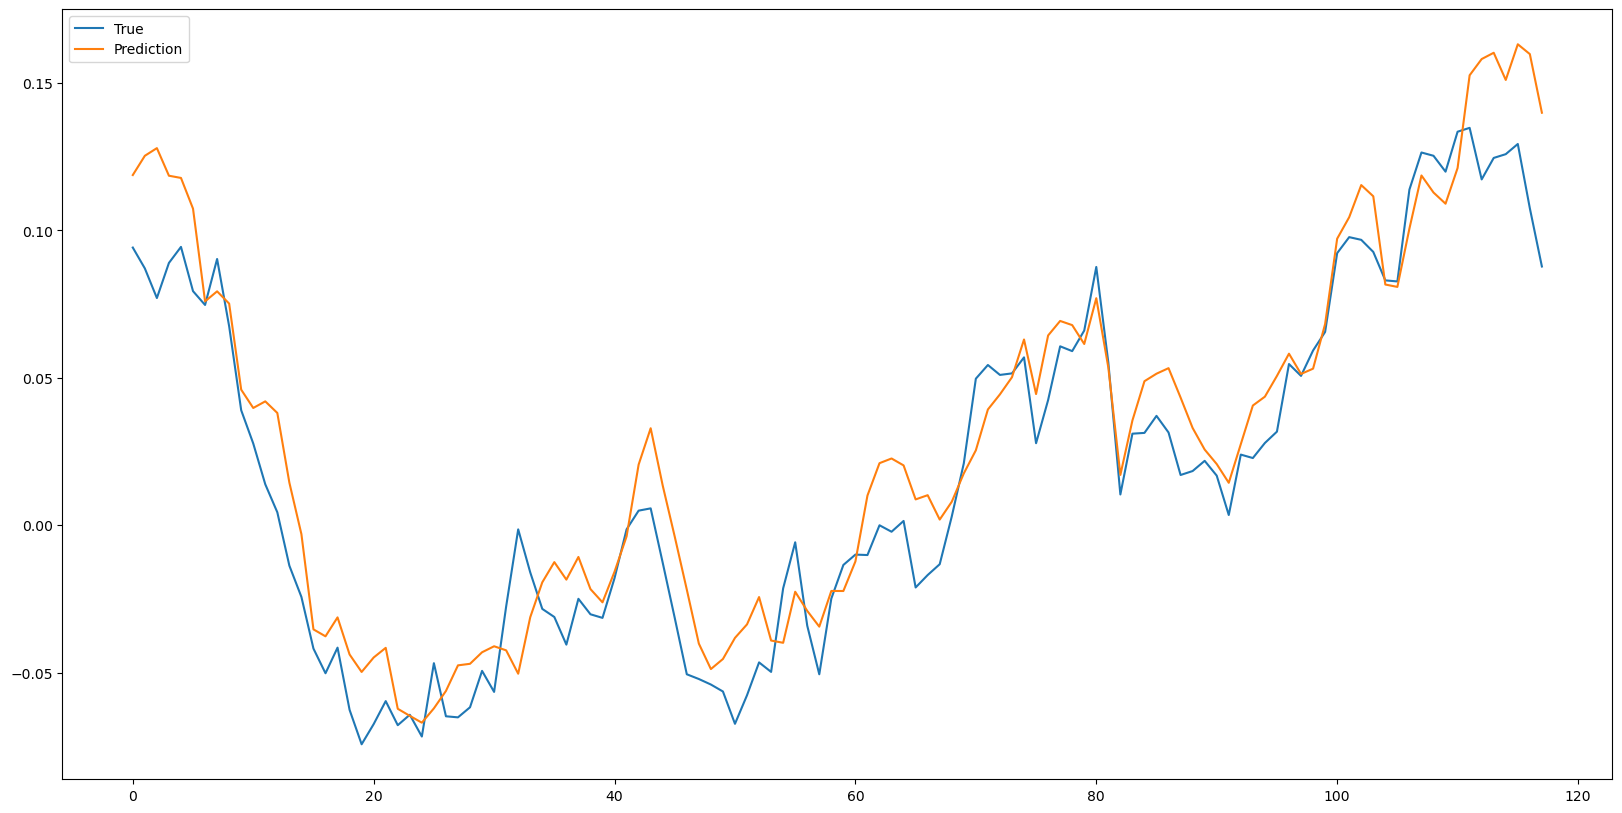

In [12]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()